# Data analysis on SUV dataset using the Logistic Regression model
## to predict wheather the customer will buy the SUV or not

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
suv = pd.read_csv("suv_data.csv")
suv.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


### Data cleaning

In [3]:
suv.drop("User ID",axis= 1,inplace = True)
#sns.heatmap(suv.isna())

### Plotting data in order to find outliers

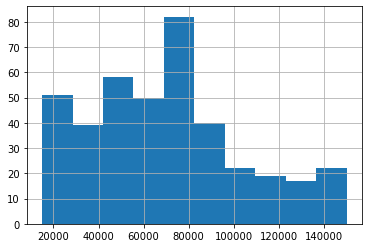

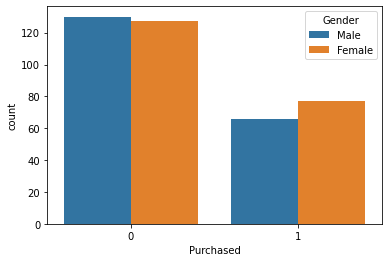

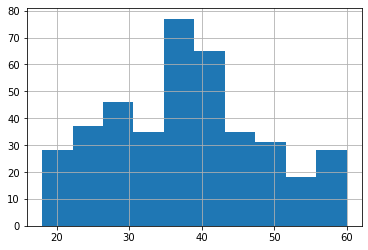

In [4]:
suv.EstimatedSalary.hist()
plt.show()
sns.countplot("Purchased",hue = "Gender",data= suv)
plt.show()
suv.Age.hist( )

In [48]:
gender = pd.get_dummies(suv.Gender,drop_first = True)
suv = pd.concat([suv,gender],axis = 1)
suv.head(2)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1


In [49]:
suv.drop("Gender",axis =1, inplace = True)


In [80]:
suv.isna().sum()
suv.head(1)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1


### Splitting Data 

In [120]:
X = suv.drop("Purchased",axis = 1)
y = suv.Purchased

## Training model and Testing Data using the Logistic Regression model

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.250, random_state=0)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.68
[[68  0]
 [32  0]]


In [127]:
print(X_train)
#print(X_test)
print(X_train1)
#print(X_test1)


     Age  EstimatedSalary  Male
312   38            50000     0
160   32           100000     1
72    20            23000     0
177   25            22000     1
276   38            71000     1
..   ...              ...   ...
73    33           113000     0
118   40            59000     1
189   28            32000     1
206   55           130000     0
355   60            34000     1

[100 rows x 3 columns]
[[-0.00952122 -0.5991405  -0.90453403]
 [-0.58079436  0.86360486  1.1055416 ]
 [-1.72334065 -1.38902299 -0.90453403]
 [-1.2472797  -1.4182779   1.1055416 ]
 [-0.00952122  0.01521255  1.1055416 ]
 [-0.29515779 -1.27200336  1.1055416 ]
 [ 1.32344945  1.27317356 -0.90453403]
 [-0.10473341 -0.51137578  1.1055416 ]
 [-0.1999456   0.13223218 -0.90453403]
 [ 1.03781288 -0.16031689  1.1055416 ]
 [-0.67600655 -1.53529753  1.1055416 ]
 [-0.29515779  0.04446746  1.1055416 ]
 [ 2.08514698  0.36627144  1.1055416 ]
 [-1.15206751 -1.59380734  1.1055416 ]
 [ 1.03781288  0.45403616  1.1055416 ]
 [ 0.18

## Analysis on scaledown data

In [142]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.240, random_state=0)
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)
logmodel.fit(X_train1,y_train)
predictions1 = logmodel.predict(X_test1)
print(accuracy_score(y_test,predictions1)*100)
print(confusion_matrix(y_test,predictions1))

90.625
[[64  3]
 [ 6 23]]


## Here we can see that there is more accurate when the trained data is scaled 
## Accuracy score for normal data - 68%
## Accuracy score for scaled data - 90.62%